# DATA 602 Final Project-Bin Lin

## Effects of Lifestyle on Health Related Quality of Life(HRQOL) 

### Introduction

According to CDC, Chronic diseases are responsible for 7 of 10 deaths each year, and treating people with chronic diseases accounts for 86% of our nation’s health care costs. One of the most contributing factors for chronic condition is each individual's lifestyle, such as diet, excercise, smoking habits as cetera. This project is just preliminary investigation upon the relationship among those factors.

### Importing Python Packages.

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.ndimage as ndimage
import scipy.misc as misc
from scipy import stats
from scipy.optimize import curve_fit
import copy
from IPython.display import display
import statsmodels.formula.api as sm
import textwrap

### Loading Data

In [2]:
#The datasets were from data.gov. I loaded three datasets as data frame.
df1 = pd.read_csv("C:/Users/blin261/Desktop/DATA602/Final Project/Behavioral_Risk_Factor_Data__Health-Related_Quality_of_Life__HRQOL_.csv", low_memory = False)
df2 = pd.read_csv("C:/Users/blin261/Desktop/DATA602/Final Project/Behavioral_Risk_Factor_Data__Tobacco_Use__2011_to_present_.csv", low_memory = False)
df3 = pd.read_csv("C:/Users/blin261/Desktop/DATA602/Final Project/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv", low_memory = False)


### Explore Data

In [3]:
#Pick the measurements that are best fit for my analysis.  
hrqol = df1.ix[:, (0, 1, 5, 8, 9, 15, 16, 17)]
hrqol.dropna(how = "any")
display(hrqol.head())
hrqol.Question.unique()

,Year,LocationAbbr,Question,Data_Value_Type,Data_Value,Sample_Size,Break_Out,Break_Out_Category
0,2010.0,AL,Mean days of activity limitation,Average number of days,0.9,202.0,18-24 years old,Age Group
1,2010.0,AL,Mean days of activity limitation,Average number of days,2.0,597.0,25-34 years old,Age Group
2,2010.0,AL,Mean days of activity limitation,Average number of days,2.3,892.0,35-44 years old,Age Group
3,2010.0,AL,Mean days of activity limitation,Average number of days,4.2,1352.0,45-54 years old,Age Group
4,2010.0,AL,Mean days of activity limitation,Average number of days,4.0,1621.0,55-64 years old,Age Group


array(['Mean days of activity limitation', 'Mean mentally unhealthy days',
       'Mean physically or mentally unhealthy days',
       'Mean physically unhealthy days',
       'Percentage with 14 or more activity limitation days',
       'Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)',
       'Percentage with 14 or more physically unhealthy days',
       'Percentage with fair or poor self-rated health'], dtype=object)

In [4]:
#Pick the measurements that are best fit for my analysis.  
tobacco = df2.ix[:, (0, 1, 4, 5, 7, 8, 10, 16, 17, 18, 19, 20)]
tobacco.dropna(how = "any")
display(tobacco.head())
tobacco.MeasureDesc.unique()

,YEAR,LocationAbbr,TopicDesc,MeasureDesc,Response,Data_Value_Unit,Data_Value,Sample_Size,Gender,Race,Age,Education
0,2014-2015,AL,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),NaN,%,21.9,11114.0,Overall,White,All Ages,All Grades
1,2014-2015,AL,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),NaN,%,20.1,4016.0,Overall,African American,All Ages,All Grades
2,2014-2015,AL,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),NaN,%,19.4,164.0,Overall,Hispanic,All Ages,All Grades
3,2014-2015,AL,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),NaN,%,13.9,170.0,Overall,Asian/Pacific Islander,All Ages,All Grades
4,2014-2015,AL,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),NaN,%,36.5,114.0,Overall,American Indian/Alaska Native,All Ages,All Grades


array(['Current Smoking \xe2\x80\x93 (2 yrs \xe2\x80\x93 Race/Ethnicity)',
       'Current Smoking', 'Percent of Former Smokers Among Ever Smokers',
       'Quit Attempt in Past Year Among Every Day Cigarette Smokers',
       'Smoking Frequency', 'Smoking Status'], dtype=object)

In [5]:
#Pick the measurements that are best fit for my analysis.  
obesity = df3.ix[:, (0, 2, 6, 7, 10, 16, 30)]
obesity.dropna(how = "any")
display(obesity.head())
obesity.Question.unique()

,YearStart,LocationAbbr,Topic,Question,Data_Value,Sample_Size,Stratification1
0,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total
1,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,2581.0,Male
2,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,4723.0,Female
3,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,1153.0,Less than high school
4,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,2402.0,High school graduate


array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity 

### Filtering and Subsetting Data

In [10]:
#For this dataset, I am only interested in data entry of "Mean physically or mentally unhealthy days" under variable Question

hrqol1 = hrqol[(hrqol.Break_Out_Category == "Overall") & (hrqol.Question == "Mean physically or mentally unhealthy days") & (hrqol.Year == 2010)]
print len(hrqol1)
display(hrqol1.head())

52


,Year,LocationAbbr,Question,Data_Value_Type,Data_Value,Sample_Size,Break_Out,Break_Out_Category
41,2010.0,AL,Mean physically or mentally unhealthy days,Average number of days,7.3,7149.0,Overall,Overall
169,2010.0,AK,Mean physically or mentally unhealthy days,Average number of days,5.4,1658.0,Overall,Overall
297,2010.0,AZ,Mean physically or mentally unhealthy days,Average number of days,6.2,5498.0,Overall,Overall
426,2010.0,AR,Mean physically or mentally unhealthy days,Average number of days,6.8,3708.0,Overall,Overall
553,2010.0,CA,Mean physically or mentally unhealthy days,Average number of days,6.5,16922.0,Overall,Overall


In [11]:
#For this dataset, I am only interested in data entry of of people who are current smoker

tobacco1 = tobacco[(tobacco.MeasureDesc == "Current Smoking") & (tobacco.Gender == "Overall") & (tobacco.Race == "All Races") & (tobacco.Age == "All Ages") & (tobacco.Education == "All Grades") & (tobacco.YEAR == "2015")]
print len(tobacco1)
display(tobacco1.head())

53


,YEAR,LocationAbbr,TopicDesc,MeasureDesc,Response,Data_Value_Unit,Data_Value,Sample_Size,Gender,Race,Age,Education
1072,2015,AL,Cigarette Use (Adults),Current Smoking,nan,%,21.4,7653.0,Overall,All Races,All Ages,All Grades
1107,2015,AK,Cigarette Use (Adults),Current Smoking,nan,%,19.1,3551.0,Overall,All Races,All Ages,All Grades
1145,2015,AZ,Cigarette Use (Adults),Current Smoking,nan,%,14.0,7598.0,Overall,All Races,All Ages,All Grades
1185,2015,AR,Cigarette Use (Adults),Current Smoking,nan,%,24.9,5042.0,Overall,All Races,All Ages,All Grades
1225,2015,CA,Cigarette Use (Adults),Current Smoking,nan,%,11.7,11368.0,Overall,All Races,All Ages,All Grades


In [12]:
#For this dataset, I am only interested in data entry of people who are obese

obesity1 = obesity[(obesity.Question == "Percent of adults aged 18 years and older who have obesity") & (obesity.Stratification1 == "Total") & (obesity.YearStart == 2015)]
print len(obesity1)

display(obesity1.head())

54


,YearStart,LocationAbbr,Topic,Question,Data_Value,Sample_Size,Stratification1
387,2015,US,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.9,398316.0,Total
45788,2015,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.6,7383.0,Total
45843,2015,AK,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.8,3434.0,Total
45896,2015,AZ,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.4,7152.0,Total
45950,2015,AR,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.5,4813.0,Total


In [13]:
#Also extract the data of those people who do moderate intensity exercise. 

string = "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)"

exercise1 = obesity[(obesity.Question == string) & (obesity.Stratification1 == "Total") & (obesity.YearStart == 2015)]
print len(exercise1)

display(exercise1.head())

54


,YearStart,LocationAbbr,Topic,Question,Data_Value,Sample_Size,Stratification1
38228,2015,AL,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,44.6,7025.0,Total
38369,2015,AK,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,58.3,3272.0,Total
38509,2015,AZ,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,53.8,6824.0,Total
38647,2015,AR,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,45.1,4478.0,Total
38787,2015,CA,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,57.3,10653.0,Total


### Merging Data and Creating Master Data Frame

In [17]:
#Since all three datasets contains same variable LocationAbbr. Merge them on LocationAbbr. 
temp = pd.merge(obesity1, exercise1, how = "left", on = "LocationAbbr")
temp = pd.merge(temp, tobacco1, how = "left", on = "LocationAbbr")
total = pd.merge(temp, hrqol1, how = "left", on = "LocationAbbr")

In [18]:
#Change column names, so it becomes more human readable.  
total = total.drop(["Stratification1", "Response", "Stratification1_x", "Stratification1_y", "YearStart_y", "YEAR", "Gender", "Race", "Age", "Education", "Year", "Break_Out", "Break_Out_Category"], axis = 1)

total.columns.values[0] = "YearStart"
total.columns.values[2] = "Topic_Obesity"
total.columns.values[3] = "Question_Obesity"
total.columns.values[4] = "Data_Value_Obesity"
total.columns.values[5] = "Sample_Size_Obesity"
total.columns.values[6] = "Topic_Exercise"
total.columns.values[7] = "Question_Exercise"
total.columns.values[8] = "Data_Value_Exercise"
total.columns.values[9] = "Sample_Size_Exercise"
total.columns.values[13] = "Data_Value_Tobacco"
total.columns.values[14] = "Sample_Size_Tobacco"
total.columns.values[17] = "Data_Value_HRQOL"
total.columns.values[18] = "Sample_Size_HRQOL"

display(total.head())

,YearStart,LocationAbbr,Topic_Obesity,Question_Obesity,Data_Value_Obesity,Sample_Size_Obesity,Topic_Exercise,Question_Exercise,Data_Value_Exercise,Sample_Size_Exercise,TopicDesc,MeasureDesc,Data_Value_Unit,Data_Value_Tobacco,Sample_Size_Tobacco,Question,Data_Value_Type,Data_Value_HRQOL,Sample_Size_HRQOL
0,2015,US,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.9,398316.0,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,50.9,381483.0,NaN,NaN,NaN,NaN,NaN,Mean physically or mentally unhealthy days,Average number of days,6.2,415664.0
1,2015,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.6,7383.0,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,44.6,7025.0,Cigarette Use (Adults),Current Smoking,%,21.4,7653.0,Mean physically or mentally unhealthy days,Average number of days,7.3,7149.0
2,2015,AK,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.8,3434.0,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,58.3,3272.0,Cigarette Use (Adults),Current Smoking,%,19.1,3551.0,Mean physically or mentally unhealthy days,Average number of days,5.4,1658.0
3,2015,AZ,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.4,7152.0,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,53.8,6824.0,Cigarette Use (Adults),Current Smoking,%,14.0,7598.0,Mean physically or mentally unhealthy days,Average number of days,6.2,5498.0
4,2015,AR,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.5,4813.0,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,45.1,4478.0,Cigarette Use (Adults),Current Smoking,%,24.9,5042.0,Mean physically or mentally unhealthy days,Average number of days,6.8,3708.0


### Data Visualization

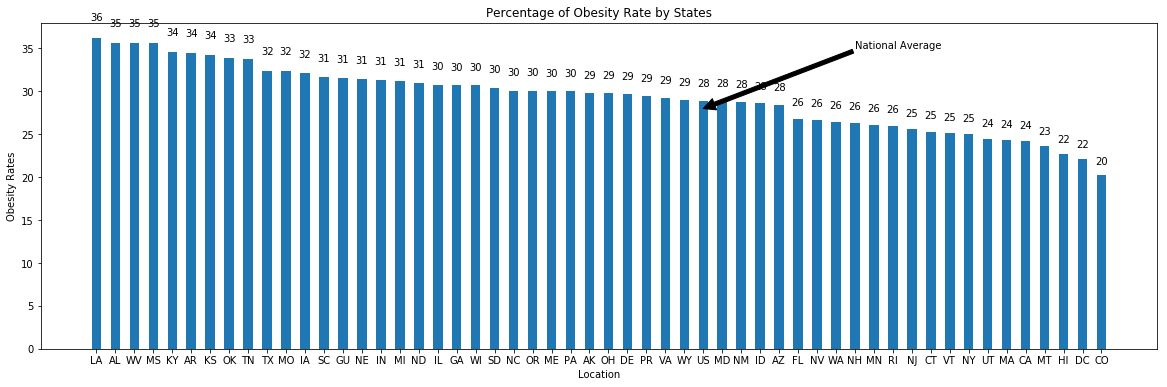

In [23]:
#Plot the bar plot of Data_Value_Obesity. Sort it in descending order. Then point out the average value (national value)

%matplotlib inline
temp = total.ix[:, (1, 4)]
temp = temp.sort_values(by = "Data_Value_Obesity", ascending = False)

x = np.arange(len(temp))
y = temp.Data_Value_Obesity

fig1 = plt.figure(1, figsize=(20, 6))
ax = fig1.add_subplot(111)
z = ax.bar(x, y,  0.5, align='center')
ax.set_xticks(x)
ax.set_xticklabels(temp.LocationAbbr)
plt.title("Percentage of Obesity Rate by States")
plt.xlabel('Location')
plt.ylabel("Obesity Rates")
plt.annotate("National Average", xy = (32, 28), xytext = (40, 35), arrowprops = dict(facecolor = "black"))
for i in z:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., 1.05*height, '%d' % int(height), ha='center', va='bottom')

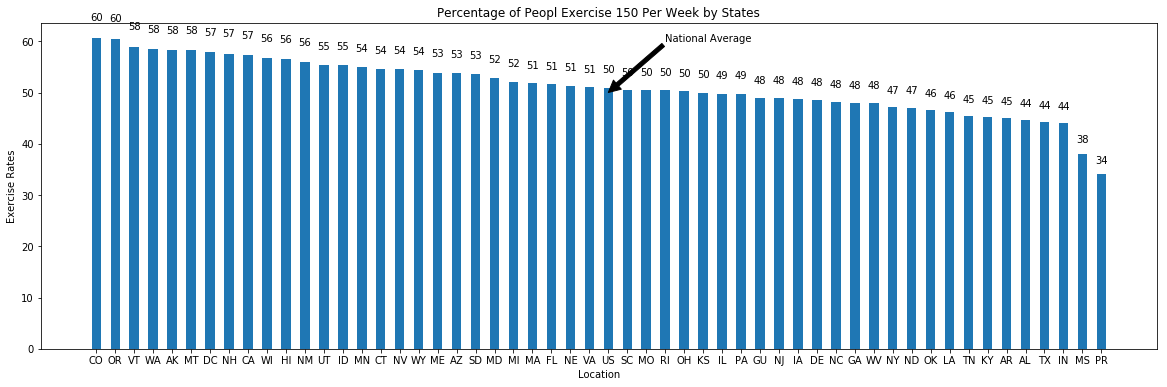

In [24]:
#Plot the bar plot of Data_Value_Exercise. Sort it in descending order. Then Point out the average value (national value)

%matplotlib inline
temp = total.ix[:, (1, 8)]
temp = temp.sort_values(by = "Data_Value_Exercise", ascending = False)

x = np.arange(len(temp))
y = temp.Data_Value_Exercise
fig1 = plt.figure(1, figsize=(20, 6))
ax = fig1.add_subplot(111)
z = ax.bar(x, y,  0.5, align='center')
ax.set_xticks(x)
ax.set_xticklabels(temp.LocationAbbr)
plt.title("Percentage of Peopl Exercise 150 Per Week by States")
plt.xlabel('Location')
plt.ylabel("Exercise Rates")
plt.annotate("National Average", xy = (27, 50), xytext = (30, 60), arrowprops = dict(facecolor = "black"))
for i in z:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., 1.05*height, '%d' % int(height), ha='center', va='bottom')

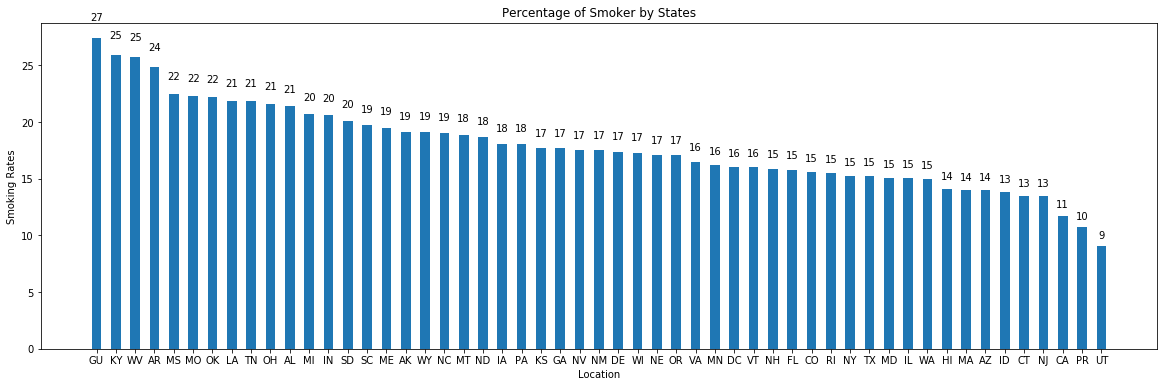

In [25]:
#Plot the bar plot of Data_Value_Tobacco. Sort it in descending order.

%matplotlib inline
temp = total.ix[:, (1, 13)]
temp = temp.dropna(how = "any")
temp = temp.sort_values(by = "Data_Value_Tobacco", ascending = False)

x = np.arange(len(temp))
y = temp.Data_Value_Tobacco

fig2 = plt.figure(2, figsize=(20, 6))
ax = fig2.add_subplot(111)
z = ax.bar(x, y,  0.5, align='center')
ax.set_xticks(x)
ax.set_xticklabels(temp.LocationAbbr)
plt.title("Percentage of Smoker by States")
plt.xlabel('Location')
plt.ylabel("Smoking Rates")
for i in z:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., 1.05*height, '%d' % int(height), ha='center', va='bottom')

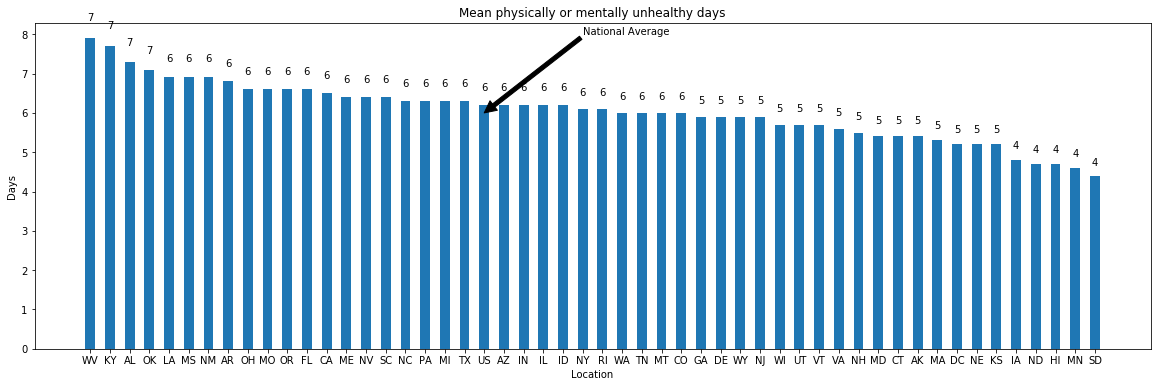

In [26]:
#Plot the bar plot of Data_Value_HRQOL. Sort it in descending order. Then Point out the average value (national value)

temp = total.ix[:, (1, 17)]
temp = temp.dropna(how = "any")
temp = temp.sort_values(by = "Data_Value_HRQOL", ascending = False)

x = np.arange(len(temp))
y = temp.Data_Value_HRQOL

fig3 = plt.figure(figsize=(20, 6))
ax = fig3.add_subplot(111)
z = plt.bar(x, y,  0.5, align='center')
ax.set_xticks(x)
ax.set_xticklabels(temp.LocationAbbr)
plt.title("Mean physically or mentally unhealthy days")
plt.xlabel('Location')
plt.ylabel("Days")
plt.annotate("National Average", xy = (20, 6), xytext = (25, 8), arrowprops = dict(facecolor = "black"))
for i in z:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., 1.05*height, '%d' % int(height), ha='center', va='bottom')

In [27]:
#Prepare the data, make it available for model and evaluation. The national average is not needed here.

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

total_subset = total[total['LocationAbbr'].isin(states)]



### Univariate Linear Regression Model
Based on the regression lines, we are able to tell obesity, smoking status are positively correlated with mean physically or mentally unhealthy days (positive slope), while exercise is negatively correlated (negative slope). Furthermore, their correlations are statisticall significant since all p-values are very closed to 0, which is less than typical significance level alpha = 0.05.


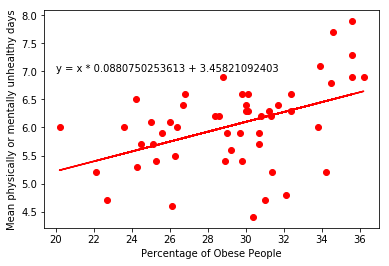

In [63]:
x = np.array(total_subset["Data_Value_Obesity"].dropna(how = "any"))
y = np.array(total_subset["Data_Value_HRQOL"].dropna(how = "any"))

plt.scatter(x, y, color = 'red')
plt.xlabel('Percentage of Obese People')
plt.ylabel("Mean physically or mentally unhealthy days")
m, b = np.polyfit(x, y, deg = 1)
plt.plot(x, m * x + b, color = "red")
plt.text(20, 7, "y = x * %s + %s" % (m, b), size=10);


slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
obesity_stat = [slope, intercept, r_value, p_value, std_err]

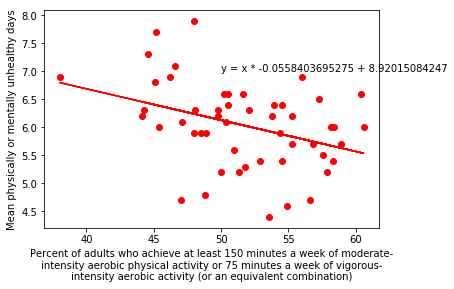

In [64]:
x = np.array(total_subset["Data_Value_Exercise"].dropna(how = "any"))
y = np.array(total_subset["Data_Value_HRQOL"].dropna(how = "any"))

plt.scatter(x, y, color = 'red')
plt.xlabel(textwrap.fill(string))
plt.ylabel("Mean physically or mentally unhealthy days")
m, b = np.polyfit(x, y, deg = 1)
plt.plot(x, m * x + b, color = "red")
plt.text(50, 7, "y = x * %s + %s" % (m, b), size=10);

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
exercise_stat = [slope, intercept, r_value, p_value, std_err]

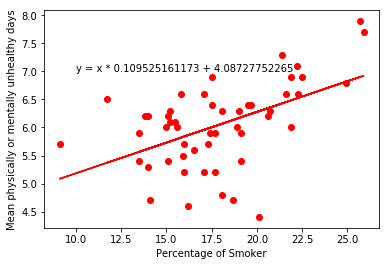

In [65]:
x = np.array(total_subset["Data_Value_Tobacco"].dropna(how = "any"))
y = np.array(total_subset["Data_Value_HRQOL"].dropna(how = "any"))

plt.scatter(x, y, color = 'red')
plt.xlabel('Percentage of Smoker')
plt.ylabel("Mean physically or mentally unhealthy days")
m, b = np.polyfit(x, y, deg = 1)
plt.plot(x, m * x + b, color = "red")
plt.text(10, 7, "y = x * %s + %s" % (m, b), size=10);

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
tabacco_stat = [slope, intercept, r_value, p_value, std_err]

In [74]:
#Create mater data frame for statistical summary.
master = pd.DataFrame({"Obesity" : obesity_stat,
                       "Exercise" : exercise_stat,
                       "Tobacco" : tabacco_stat},
                     index = ["Slope", "Intercept", "R Value", "P Value", "Standard Deviation"])

print master

                    Exercise   Obesity   Tobacco
Slope              -0.055840  0.088075  0.109525
Intercept           8.920151  3.458211  4.087278
R Value            -0.367888  0.450310  0.505570
P Value             0.007908  0.000914  0.000154
Standard Deviation  0.020163  0.024948  0.026702


### Multivariate Linear Regression Model

In [75]:
#Impute all na
a = np.array(total_subset["Data_Value_HRQOL"].dropna(how = "any"))
b = np.array(total_subset["Data_Value_Obesity"].dropna(how = "any"))
c = np.array(total_subset["Data_Value_Exercise"].dropna(how = "any"))
d = np.array(total_subset["Data_Value_Tobacco"].dropna(how = "any"))

#Build multivariate linear regression model from a data frame, then print out summary statistics regarding the model. 
data = pd.DataFrame({"a": a, "b": b, "c": c, "d": d})
model = sm.ols("a ~ b + c + d", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      a   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     5.854
Date:                Wed, 24 May 2017   Prob (F-statistic):            0.00175
Time:                        15:54:46   Log-Likelihood:                -49.573
No. Observations:                  51   AIC:                             107.1
Df Residuals:                      47   BIC:                             114.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7990      2.227      2.155      0.036       0.318       9.280
b              0.0181      0.044      0.408      0.685      -0.071       0.107
c             -0.0150      0.027     -0.557      0.580      -0.069       0.039
d              0.0832      0.041      2.042      0.047       0.001       0.165
==============================================================================
Omnibus:                        6.161   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.202
Skew:                          -0.751   Prob(JB):                       0.0742
Kurtosis:                       3.437   Cond. No.                     1.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion
This project evaluates three very simple but large datasets. There is a lot more to dig into those other variables that I have filtered out. From the bar graph, we are able to tell a lot of information. Top three states with highest obesity rates are: LA, AL, WV. Top three states with highest smoking rates are GU, KY, WV et cetera. The linear model for the four variables I evaluated can be written as: a = 0.0181b - 0.015c + 0.0832d + 4.799, where a is number of unhealthy day, b is obesity rate, c is percentage of people do moderate intensity exercise, and d is smoking rate. However, this model only works well on the state level. It is not for general population as determined by the nature of those data.